In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# 10 micro

In [6]:
modulation = 93 #Hz
loop_number = 75    
res = 1/3002832000

sam, sr , segment_length = Adj9(res,modulation,loop_number)

In [7]:
sam

215280

In [8]:
sr

3003156000

In [9]:
interval = segment_length*1e6 #micro
interval

71.68458781362007

# AWG and Pulse files setup

In [2]:
AWG_Settings_10micro= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':150,
    'Clock Sample Frecuency':3003156000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out # DC
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Prepared Pulse Schemes CSV\60,30\neg\10micro'
}

In [ ]:
M8190A = VisaR(AWG_Settings_10micro,60000)

In [ ]:
M8190A.write('FREQ:RAST {a}'.format(a = sr))

21

In [ ]:
Initialization(M8190A,AWG_Settings_10micro)

Instruments Sampling Frecuency set to 1.25760000000000E+08Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [10]:
Pump_10micro = {
    'Name':'Pump_10micro',
    'Amplitude': -2*60,
    'Start time':30,
    'End time':2e-10,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':0,
    'Sweep Duration':0
}

In [11]:
ProbeA_10micro = {
    'Name':'ProbeA_10micro',
    'Amplitude':-2*30,
    'Start time':10,
    'End time':50,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [12]:
ProbeB_10micro= {
    'Name':'ProbeB_10micro',
    'Amplitude':2*30,
    'Start time':10,
    'End time':50,
    'Start Duration':10,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [13]:
PulseScheme_A_10micro =  {
    'Name' : 'PulseScheme_A_10micro',
    'Pulse Scheme': [Pump_10micro,ProbeA_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\neg\10micro'
}

In [19]:
PulseScheme_B_10micro =  {
    'Name' : 'PulseScheme_B_10micro',
    'Pulse Scheme': [Pump_10micro,ProbeB_10micro],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\Autocorrelation measurements\60,30\neg\10micro'
}

In [15]:
PulseScheme_A_10micro['Measurement file Path']

'D:\\Alejandro\\Pulses\\diode measurements\\Autocorrelation measurements\\60,30\\neg\\10micro'

In [ ]:
sweeping_run_a_10micro = Sweeping_Single_List_File_teil(PulseScheme_A_10micro,30,interval,sam,0,30,AWG_Settings_10micro,'A')[0]

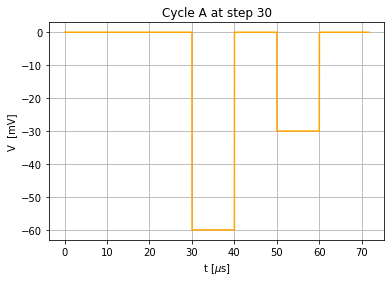

In [29]:
step = 30
pul1 = Sweep_teil(PulseScheme_A_10micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle A at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10u {mod} Hz ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

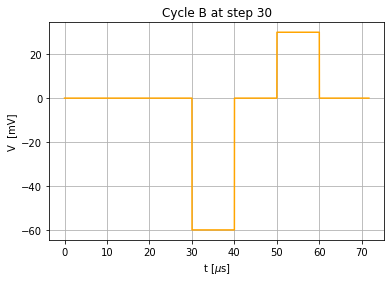

In [31]:
step = 30
pul1 = Sweep_teil(PulseScheme_B_10micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle A, Probe width 10u {mod} Hz ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

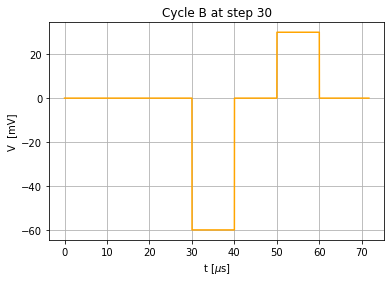

In [21]:
step = 30
pul1 = Sweep_teil(PulseScheme_B_10micro,30,step,interval,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0]/2,label= '{b} samples'.format(b = sam),color='red')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [$\mu$s]')
ax.set_title('Cycle B at step {a}'.format(a = step )) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig(r'{loc}\Cycle B, Probe width 10micro {mod} Hz  ,{a} step, {loop}loop number.jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'], a = step,mod = modulation, loop = loop_number))

In [24]:
sweeping_run_a_10micro = Sweeping_Single_List_File_teil(PulseScheme_A_10micro,30,interval,sam,0,30,AWG_Settings_10micro,'A')[0]
sweeping_run_b_10micro = Sweeping_Single_List_File_teil(PulseScheme_B_10micro,30,interval,sam,0,30,AWG_Settings_10micro,'B')[0]

In [26]:
#Exporting pickle

with open(r"{dict}\cycleA_31steps_93Hz_10micro_.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "wb") as k:
    pickle.dump(sweeping_run_a_10micro, k)


with open(r"{dict}\cycleB_31steps_93Hz_10micro_.p".format(dict = PulseScheme_B_10micro['Measurement file Path']), "wb") as h:
    pickle.dump(sweeping_run_b_10micro, h)

In [ ]:
#Importing Pickle

with open(r"{dict}\cycleA_31steps_93Hz_10micro_.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as j:
    sweeping_runa_10micro = pickle.load(j)

with open(r"{dict}\cycleB_31steps_93Hz_10micro_.p".format(dict = PulseScheme_A_10micro['Measurement file Path']), "rb") as f:
    sweeping_runb_10micro= pickle.load(f)

In [ ]:
sweeping_run_a_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentA_672816_30.csv'

In [ ]:
sweeping_run_b_10micro['Pulse File Location, at step 30']

'D:\\Alejandro\\Pulses\\diode measurements\\Prepared Pulse Schemes CSV\\50,20\\1mili\\SegmentB_672816_30.csv'

In [ ]:
loop_micro

75

In [ ]:
Sequence_File(M8190A,sweeping_runa_10micro['Pulse File Location, at step 30'],sweeping_runb_10micro['Pulse File Location, at step 30'],75)

Sequence loaded with the following segment data "1,8,0,1,0,1919999,2,8,0,1,0,1919999" and the advancement method is COND


0

# Loading

In [ ]:
M8190A.write('SEQ:DEL:ALL')

12

In [ ]:
Dummy_File(M8190A)

Dummy File Loaded and playing
Dummy File stopped and erased from AWGs memmory


In [ ]:
Lock_In_Settings = {
'Time Constant' : '100ms',
'Sensitivity' : '200 miliVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': r'{mod}Hz'.format(mod=modulation)
}

In [ ]:
loop_number

In [ ]:
playingtime = 7

data, averaged_data = Voltage_Autocorrelation_loop_cut(M8190A,DAQ_Settings1,playingtime,sweeping_run_a_10micro,sweeping_run_b_10micro,PulseScheme_A_10micro['Measurement file Path'],Lock_In_Settings,loop_number,2)

Sequence loaded with the following segment data "1,75,0,1,0,222431,2,75,0,1,0,222431" and the advancement method is COND
Average Value for measurement at step 0 is -0.0058006285248500145 V
Sequence loaded with the following segment data "1,75,0,1,0,222431,2,75,0,1,0,222431" and the advancement method is COND
Average Value for measurement at step 1 is 0.23105345932950375 V
Sequence loaded with the following segment data "1,75,0,1,0,222431,2,75,0,1,0,222431" and the advancement method is COND
Average Value for measurement at step 2 is 0.23134240706036804 V
Sequence loaded with the following segment data "1,75,0,1,0,222431,2,75,0,1,0,222431" and the advancement method is COND
Average Value for measurement at step 3 is 0.233210681584823 V
Sequence loaded with the following segment data "1,75,0,1,0,222431,2,75,0,1,0,222431" and the advancement method is COND
Average Value for measurement at step 4 is 0.23416394210029293 V
Sequence loaded with the following segment data "1,75,0,1,0,222431,2,

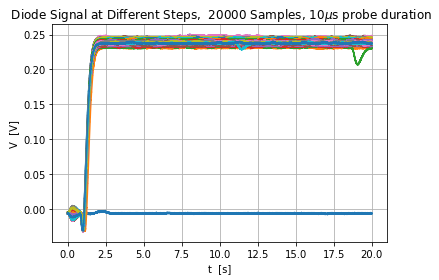

In [ ]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(data)):
    plt.plot(data[i][1],data[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [arb. U]')
ax.set_xlabel('t  [s]')
ax.set_title(r' STM Signal at Different Steps,  {b} Samples, 10$\mu$s probe duration'.format(b = len(data[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()

fig.savefig(r'{loc}\STM Signal time cstant = {a}, sensitivity {b},{c} daqseconds, , probe duration 10micro ,{st} steps, {mod} Hz.jpeg'.format(mod = modulation ,loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, st = len (sweeping_run_a_10micro)),bbox_inches='tight')

In [ ]:
time_delay = np.linspace(-20,20,31)

In [ ]:
%matplotlib widget

In [ ]:
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'10$\mu$s Probe Width ',color='red')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()


fig.savefig(r'{loc}\Measured Autocorrelation function {st} steps 10micro {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [16]:
background_10u = Signal_to_Background(averaged_data,time_delay,8,8)
background_10u

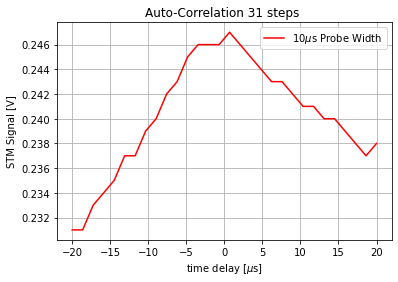

In [23]:


fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,background_10u[0],'.-',label=r'10 $\mu$s Pulse Width ',color='green')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb Units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\background corrected Autocorrelation function {st} steps 10micro {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))

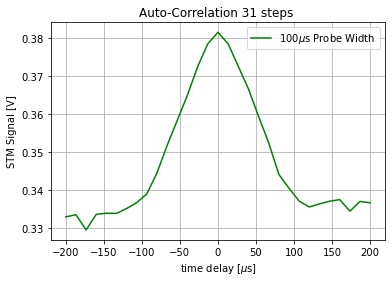

In [25]:
norm_10u=(background_10u[0]-1)/(np.amax(background_10u[0]-1))
np.savetxt(r'Averaged\Signal to background\Normalized autocorrelation 10u.csv',norm_10u,delimiter=',')



fig,axes = plt.subplots()

axes.grid(True)


plt.plot(time_delay,norm_10u,'.-',label=r'10 $\mu$s Pulse Width ',color='green')


axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'STM Signal [arb. units]')
axes.set_title(r'Auto-Correlation {st} steps '.format(st = len (time_delay)))

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Normalized Autocorrelation function {st} steps 10micro {mod} Hz length tc = {a}, sens {b}, {c}s DAQ, {loop} loop number .jpeg'.format(loc = PulseScheme_A_10micro['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playingtime, loop =loop_number,st = len (time_delay), mod = modulation ))